In [1]:
library(tximport)
library(edgeR)
library(tidyverse)
library("tximport")
library("ggplot2")
library("tidyverse")
library("readxl")
library("ggrepel")
library("reshape2")
library("RColorBrewer")
library("ggpubr")
library(gridExtra)
library(stringr)
library(dplyr)
path_data <- "MAT_expression/"
setwd(path_data)

Loading required package: limma

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:

#Not all transcripts have gene names
samples <- c("Pst87", "Pca12NC29", "Pgt210", "Pst104E")
for (i in samples){
  tx2gene <-read.table(paste0(i, "_kallisto/", i, "_tx2gene"), stringsAsFactors = FALSE)
  tx2gene_name <- read.table(paste0(i, "_kallisto/", i, "_tx2gene_name"), stringsAsFactors = FALSE)
  #left join tx2gene and tx2gene_name
  tmp<-left_join(tx2gene, tx2gene_name, by = c("V2" = "V1"))
  #if gene name is NA, use transcript name
  if(i !="Pst104E"){
    tmp$V2.y[is.na(tmp$V2.y)]<-tmp$V2[is.na(tmp$V2.y)]
  }else {
    tmp$V2.y[is.na(tmp$V2.y)]<-tmp$V1[is.na(tmp$V2.y)]
  }
  tmp<-tmp[,c("V1","V2.y")]
  colnames(tmp)<-c("V1","V2")
  assign(paste0(i, "_tx2gene"), tmp)
}

tx2gene_list <- list(Pst87_tx2gene, Pca12NC29_tx2gene, Pgt210_tx2gene, Pst104E_tx2gene)
# loop through the list and find the rows containing 'HD' or 'STE3'
for (i in seq_along(tx2gene_list)) {
  tx2gene <- tx2gene_list[[i]]
  rows <- grepl("HD|STE3", tx2gene$V2)
#  print(paste0("Rows containing 'HD' or 'STE3' in ", names(tx2gene_list)[i], "_tx2gene:"))
#  print(tx2gene[rows, ])
}


In [3]:
for (i in samples){
    file <- paste0(i, "_list.xlsx")
    assign(paste0(i, "_list"), read_excel(file))
    files <- file.path(paste0(i, "_kallisto"), eval(as.symbol(paste0(i, "_list")))$run, "abundance.tsv")
    names(files) <- paste0(eval(as.symbol(paste0(i, "_list")))$species, "_", eval(as.symbol(paste0(i, "_list")))$timepoint, "_", eval(as.symbol(paste0(i, "_list")))$replicate)
    tx2gene <-eval(as.symbol(paste0(i, "_tx2gene")))
    assign(paste0(i, "_kallisto"), tximport(files, type = "kallisto", tx2gene = tx2gene, ignoreAfterBar = TRUE))
}

Note: importing `abundance.h5` is typically faster than `abundance.tsv`

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 


summarizing abundance

summarizing counts

summarizing length

Note: importing `abundance.h5` is typically faster than `abundance.tsv`

reading in files with read_tsv

1 
2 
3 
4 
5 
6 


removing duplicated transcript rows from tx2gene

summarizing abundance

summarizing counts

summarizing length

Note: importing `abundance.h5` is typically faster than `abundance.tsv`

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 


summarizing abundance

summarizing counts

summarizing length

Note: importing `abundance.h5` is typically faster than `abundance.tsv`

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 


summarizing abundance

summarizing counts

summarizing length



In [4]:
# Install the jsonlite package if not already installed
if (!require(jsonlite)) {
  install.packages("jsonlite")
}

# Load the jsonlite package
library(jsonlite)

Loading required package: jsonlite


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [5]:
#read all run_info.json file
for (i in samples){
    list_SRA <- eval(as.symbol(paste0(i, "_list")))
    for (l in 1:nrow(list_SRA)){
        run<- list_SRA[l, ]$run
        sample_tag<-paste0(i, "_", list_SRA[l, ]$timepoint, "_", list_SRA[l, ]$replicate)
        file <- file.path(paste0(i, "_kallisto"), run, "run_info.json")
        tmp<-jsonlite::fromJSON(file)
        tmp_dataframe<-data.frame(sample_tag, tmp$n_processed, tmp$n_pseudoaligned, tmp$n_unique)
        colnames(tmp_dataframe)<-c("sample_tag", "n_processed", "n_pseudoaligned", "n_unique")
        if (l == 1){
            assign(paste0(i, "_run_info"), tmp_dataframe)
        }else{
            assign(paste0(i, "_run_info"), rbind(eval(as.symbol(paste0(i, "_run_info"))), tmp_dataframe))
        }
    }
}

In [6]:
Pst87_run_info
Pca12NC29_run_info
Pgt210_run_info
Pst104E_run_info

sample_tag,n_processed,n_pseudoaligned,n_unique
<chr>,<int>,<int>,<int>
Pst87_24_1,41702068,18081,8108
Pst87_24_2,38275145,18226,7857
Pst87_24_3,38913421,14776,6326
Pst87_48_1,6579672,2648,1247
Pst87_48_2,37128934,22085,9316
Pst87_48_3,7145250,2703,1263
Pst87_72_1,14503887,4928,2141
Pst87_72_2,16068103,5750,2639
Pst87_72_3,15304922,11003,4612


sample_tag,n_processed,n_pseudoaligned,n_unique
<chr>,<int>,<int>,<int>
Pca12NC29_48_1,26213096,1571428,610391
Pca12NC29_48_2,23613269,1096865,428375
Pca12NC29_48_3,25801576,1276810,485914
Pca12NC29_120_1,23847329,11856757,4658769
Pca12NC29_120_2,23673838,11754450,4590513
Pca12NC29_120_3,23534310,11659026,4537903


sample_tag,n_processed,n_pseudoaligned,n_unique
<chr>,<int>,<int>,<int>
Pgt210_48_1,107287664,154258,120201
Pgt210_48_2,124417671,126157,96783
Pgt210_48_3,122350705,117093,82563
Pgt210_72_1,113253315,190467,132544
Pgt210_72_2,126050868,191969,121940
Pgt210_72_3,123992672,201655,136203
Pgt210_96_1,83514268,349493,210276
Pgt210_96_2,83353581,337265,212749
Pgt210_96_3,80817205,324501,194973


sample_tag,n_processed,n_pseudoaligned,n_unique
<chr>,<int>,<int>,<int>
Pst104E_US_1,14745997,12070478,5313855
Pst104E_US_2,16389242,13362997,5889135
Pst104E_US_3,15671687,12682343,5586297
Pst104E_GS_1,50036816,37806524,16360938
Pst104E_GS_2,52531699,38166816,16673867
Pst104E_GS_3,54364949,41736024,18261816
Pst104E_144_1,18214831,2091506,796112
Pst104E_144_2,2418249,373662,148992
Pst104E_144_3,15959465,1783686,675584


In [7]:
for (i in samples){
  cts <- eval(as.symbol(paste0(i, "_kallisto")))$counts
  normMat <- eval(as.symbol(paste0(i, "_kallisto")))$length
  normMat <- normMat/exp(rowMeans(log(normMat)))
  normCts <- cts/normMat
  eff.lib <- calcNormFactors(normCts) * colSums(normCts)
  normMat <- sweep(normMat, 2, eff.lib, "*")
  normMat <- log(normMat)
  if(i != "Pst104E"){
  group <- eval(as.symbol(paste0(i, "_list")))$timepoint %>%as.factor
  }else{
  group <-factor(c(rep("US", times = 3), rep("GS", times = 3), rep("144", times = 3),
                               rep("216", times = 3), rep("HE", times = 3)), levels = c("US", "GS", "144", "216", "HE"))
  }
  assign(paste0(i, "_group"), group)
  y <- DGEList(counts=cts, group=group)
  assign(paste0(i, "_DGEList"), y)
  y <- scaleOffset(y, normMat)
  design <-model.matrix(~0+group)
  assign(paste0(i, "_design"), design)
  keep <- filterByExpr(y,min.count=5)
  y <- y[keep,,keep.lib.sizes=FALSE]
  #  object contains offsets, which take precedence over library sizes and norm factors (and which will not be recomputed).
  #y <- normLibSizes(y)
  cpms <- edgeR::cpm(y, offset = y$offset, log = FALSE)
  y <- estimateDisp(y, design, robust=TRUE)
  assign(paste0(i, "_y"),y)
  assign(paste0(i, "_cpms"),cpms)
}

In [8]:
MAT <- c("bW1-HD1", "bW2-HD1", "bE1-HD2", "bE2-HD2", "STE3.2-2", "STE3.2-3")
MAT_Pst87 <- c("Pst87/66_chr4A_bE-HD", "Pst87/66_chr4B_bE-HD", "Pst87/66_chr4A_bW-HD", "Pst87/66_chr4B_bW-HD", "STE3.2-2", "STE3.2-3")
Pst104E_MAT_cpms<-Pst104E_cpms[rownames(Pst104E_cpms) %in% MAT,]
Pst87_MAT_cpms<-Pst87_cpms[MAT_Pst87,]
Pgt210_MAT_cpms<-Pgt210_cpms[rownames(Pgt210_cpms) %in% MAT,]
Pca12NC29_MAT_cpms<-Pca12NC29_cpms[rownames(Pca12NC29_cpms) %in% MAT,]

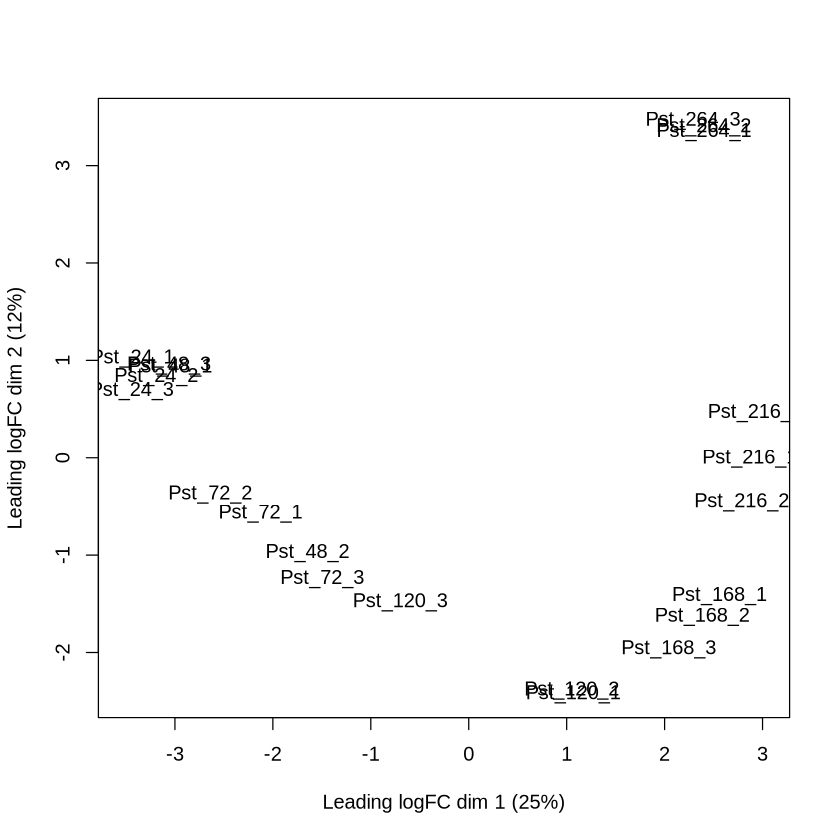

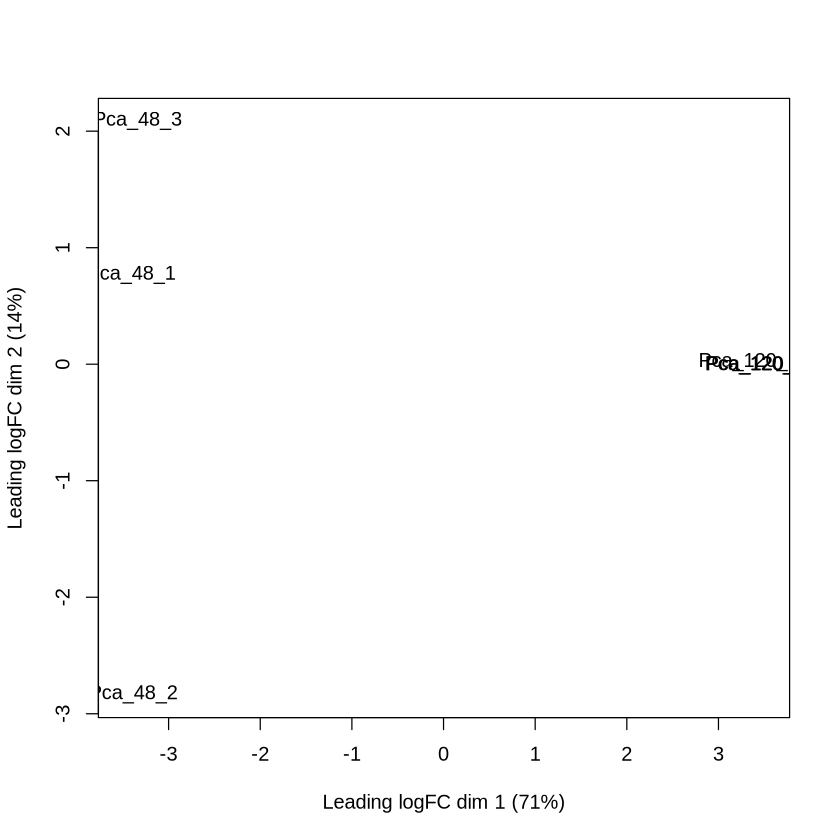

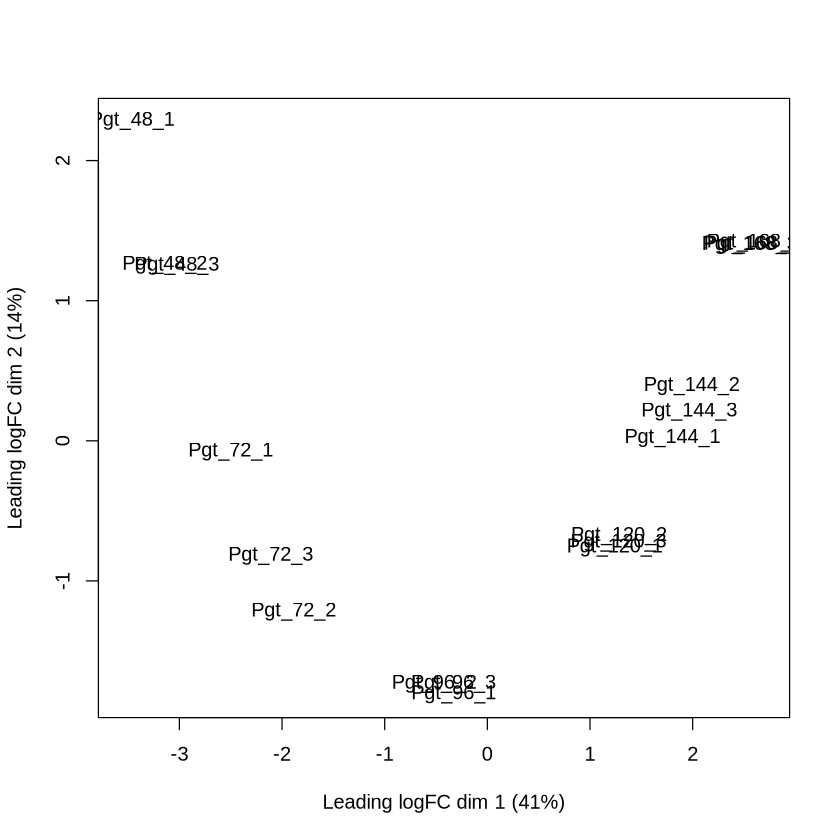

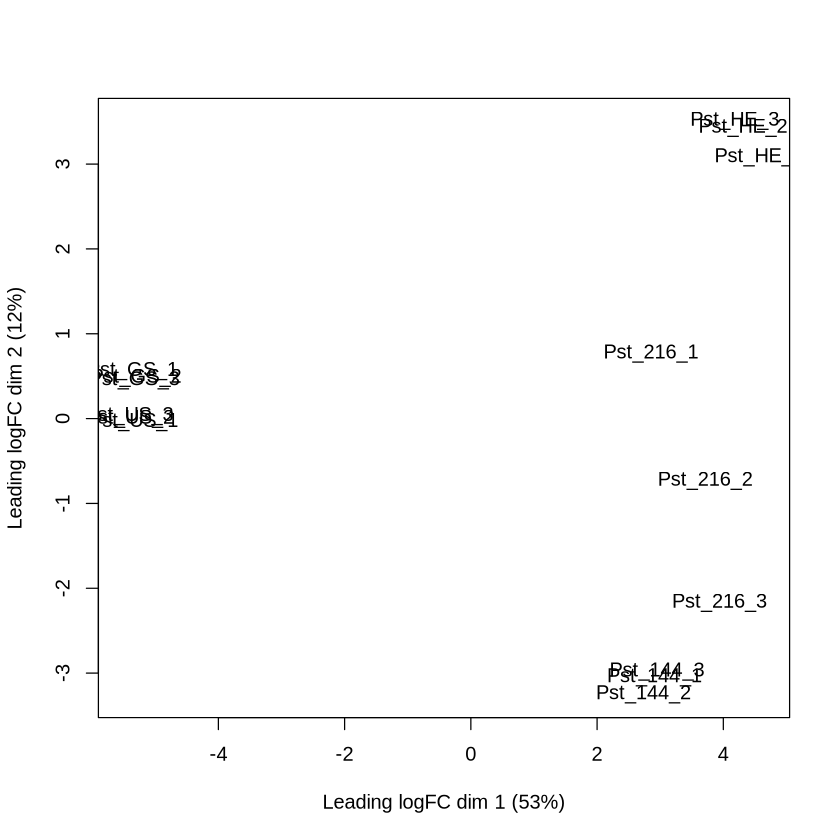

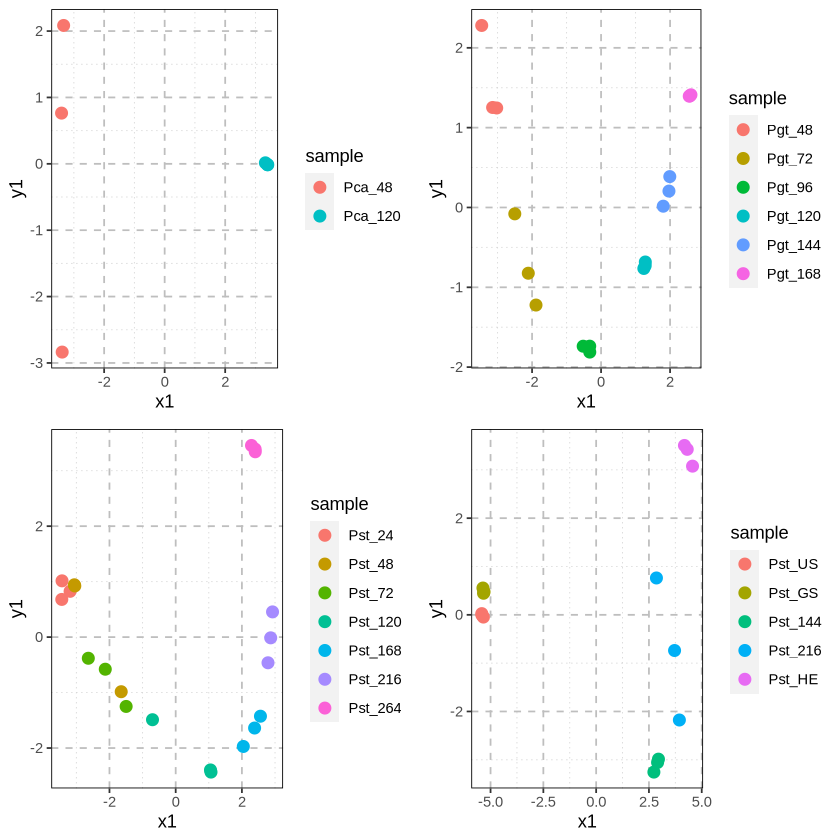

In [9]:
#Make mds plot
for (s in samples){
  assign(paste0(s, "_mds"), plotMDS(eval(as.symbol(paste0(s, "_DGEList")))))
  x1<-eval(as.symbol(paste0(s,"_mds")))$x
  y1<-eval(as.symbol(paste0(s,"_mds")))$y
  sample<-colnames(eval(as.symbol(paste0(s,"_DGEList"))))%>%str_replace(".{2}$","")
  mds0<-data.frame(x1 = x1,y1 = y1, sample = sample)
  mds0$sample<-factor(mds0$sample, levels = unique(sample))
  assign(paste0(s, "_mds0"), mds0)
}
for (s in samples){
  tmp_plot<-ggplot(aes(x=x1, y=y1, color=sample), data=eval(as.symbol(paste0(s, "_mds0")))) + geom_point(size=3) +
             labs(color="sample") + theme(panel.background = element_rect(fill = "white"),
                                            panel.border = element_rect(color = "black", fill = NA),
                                            panel.grid.major = element_line(color = "gray", linetype = "dashed"),
                                            panel.grid.minor = element_line(color = "lightgray", linetype = "dotted"))
   assign(paste0(s, "_mdsplot"),tmp_plot)
}

grid.arrange(Pca12NC29_mdsplot, Pgt210_mdsplot, Pst87_mdsplot, Pst104E_mdsplot, nrow = 2, ncol = 2)

In [10]:
for (i in samples){
    assign(paste0(i, "_fit"), glmQLFit(eval(as.symbol(paste0(i, "_y"))), eval(as.symbol(paste0(i, "_design")))))
}
Pst87_contrast_matrix<- makeContrasts("48V24" = group48 -group24,
                                    "72V48" = group72 -group48,
                                    "120V72" = group120 -group72,
                                    "168V120" = group168 -group120,
                                    "216V168" = group216 -group168,
                                    "264V216" = group264 -group216, levels = Pst87_design)

Pst104E_contrast_matrix<- makeContrasts("GSVUS" = groupGS -groupUS,
                                        "144VGS" = group144 -groupGS,
                                        "216V144" = group216 -group144,
                                        "HEV216" = groupHE -group216, levels = Pst104E_design)
Pgt210_contrast_matrix <- makeContrasts("72V48" = group72 -group48,
                                        "96V72" = group96 -group72,
                                        "120V96" = group120 -group96,
                                        "144V120" = group144 -group120,
                                        "168V144" = group168 -group144, levels = Pgt210_design)
Pca12NC29_contrast_matrix <- makeContrasts("120V48" = group120 -group48, levels = Pca12NC29_design)
Pst87_contrast_matrix
Pst104E_contrast_matrix
Pgt210_contrast_matrix
Pca12NC29_contrast_matrix

,48V24,72V48,120V72,168V120,216V168,264V216
group24,-1,0,0,0,0,0
group48,1,-1,0,0,0,0
group72,0,1,-1,0,0,0
group120,0,0,1,-1,0,0
group168,0,0,0,1,-1,0
group216,0,0,0,0,1,-1
group264,0,0,0,0,0,1


,GSVUS,144VGS,216V144,HEV216
groupUS,-1,0,0,0
groupGS,1,-1,0,0
group144,0,1,-1,0
group216,0,0,1,-1
groupHE,0,0,0,1


,72V48,96V72,120V96,144V120,168V144
group48,-1,0,0,0,0
group72,1,-1,0,0,0
group96,0,1,-1,0,0
group120,0,0,1,-1,0
group144,0,0,0,1,-1
group168,0,0,0,0,1


,120V48
group48,-1
group120,1


In [11]:
#assign contrast 
for (i in samples){
  contrast <- eval(as.symbol(paste0(i, "_contrast_matrix"))) %>%as.data.frame()%>%colnames()
  for (c in contrast){
    assign(paste0(i, ".",c), glmLRT(eval(as.symbol(paste0(i, "_fit"))), contrast=eval(as.symbol(paste0(i, "_contrast_matrix")))[,c] ))
  }
}

In [12]:
for (i in samples){
  if(i!="Pst87"){
  contrast <- eval(as.symbol(paste0(i, "_contrast_matrix"))) %>%as.data.frame()%>%colnames()
  for (c in contrast){
    LRT_value <- eval(as.symbol(paste0(i, ".",c)))$table%>%as.data.frame()
    LRT_value <- LRT_value[MAT,]%>%select("logFC", "PValue")%>%mutate(gene=MAT,cont=c, sample=i)
    if(c == contrast[1]){
      assign(paste0(i, "_LRT_value"), LRT_value)
    }else{
      assign(paste0(i, "_LRT_value"), rbind(eval(as.symbol(paste0(i, "_LRT_value"))), LRT_value))
    }
  }
 }
}
for (i in samples){
  if(i=="Pst87"){
  contrast <- eval(as.symbol(paste0(i, "_contrast_matrix"))) %>%as.data.frame()%>%colnames()
  for (c in contrast){
    LRT_value <- eval(as.symbol(paste0(i, ".",c)))$table%>%as.data.frame()
    LRT_value <- LRT_value[MAT_Pst87,]%>%select("logFC", "PValue")%>%mutate(gene=MAT_Pst87,cont=c, sample=i)
    if(c == contrast[1]){
      assign(paste0(i, "_LRT_value"), LRT_value)
    }else{
      assign(paste0(i, "_LRT_value"), rbind(eval(as.symbol(paste0(i, "_LRT_value"))), LRT_value))
    }
  }
 }  
}
#Replace name in Pst87
Pst87_LRT_value$gene<-str_replace(Pst87_LRT_value$gene, "Pst87/66_chr4A_bE-HD", "bE1-HD2")
Pst87_LRT_value$gene<-str_replace(Pst87_LRT_value$gene, "Pst87/66_chr4B_bE-HD", "bE2-HD2")
Pst87_LRT_value$gene<-str_replace(Pst87_LRT_value$gene, "Pst87/66_chr4A_bW-HD", "bW1-HD1")
Pst87_LRT_value$gene<-str_replace(Pst87_LRT_value$gene, "Pst87/66_chr4B_bW-HD", "bW2-HD1")

for (i in samples){
  LRT <- eval(as.symbol(paste0(i, "_LRT_value")))
  LRT$P_value<-ifelse(LRT$PValue < 0.001, "***",
                              ifelse(LRT$PValue < 0.01, "**",
                                     ifelse(LRT$PValue < 0.05, "*", "")))
  LRT$cont <-factor(LRT$cont, levels = unique(LRT$cont))
  assign(paste0(i, "_LRT"), LRT)                                    
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


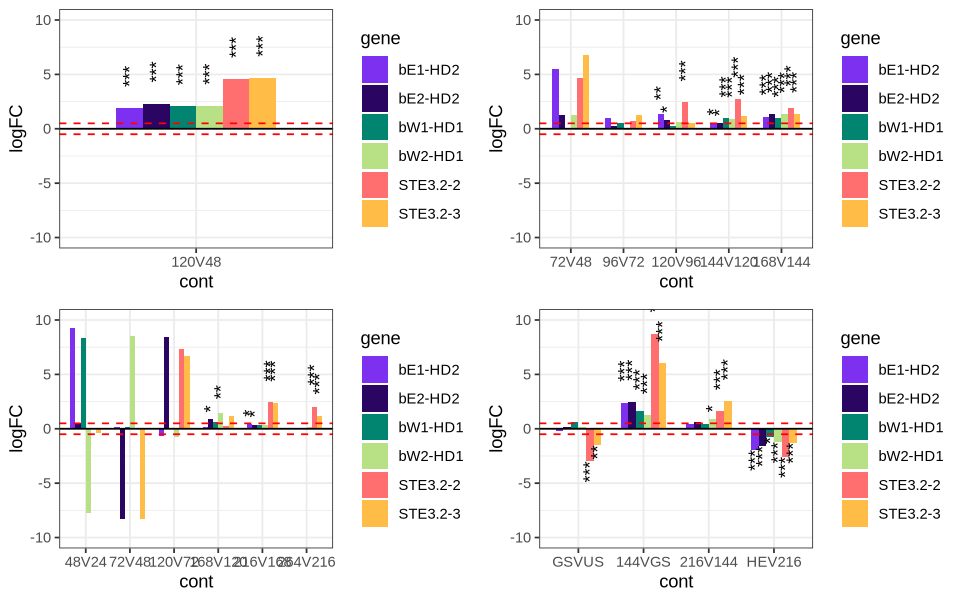

In [13]:
for (i in samples){
  FC <- eval(as.symbol(paste0(i, "_LRT")))
  FC_plot <- ggplot(FC, aes(x=cont, y=logFC,fill=gene)) + 
  geom_bar(stat="identity", position = "dodge", width=0.7) +
  scale_y_continuous(limits = c(-10,10))+ scale_fill_manual(values=c("#7D30F0", "#2A0561", "#018571", "#B8E186",  "#FF6F6F","#FFBC47"))+theme_minimal()+
#  scale_y_break(c(0.5, 1), scales = 1)+scale_y_break(c(-0.5, -1), scales = 1)+
  theme_bw()+geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.5)+geom_hline(yintercept=-0.5, linetype="dashed", color = "red", size=0.5)+
  geom_text(aes(label = P_value), position = position_dodge(width = 0.7), vjust = 0.5, angle = 90, hjust = ifelse(FC$logFC > 0, -1, 1)) +geom_hline(yintercept=0, color = "black", size=0.5)
  assign(paste0(i, "_FC_plot"), FC_plot)
#  ggsave(file=paste0(i,"_FC_plot.svg"), plot=FC_plot, width = 8, height = 5, units = "in", dpi = 300)
}
options(repr.plot.width=8, repr.plot.height=5)
grid.arrange(Pca12NC29_FC_plot, Pgt210_FC_plot, Pst87_FC_plot, Pst104E_FC_plot, nrow = 2, ncol = 2)

In [14]:
#Make data frame for plot
for (i in samples){
  data <- eval(as.symbol(paste0(i, "_MAT_cpms")))%>%melt()
  colnames(data) <- c("gene", "Timepoint", "cpm")
  data <- mutate(data, group = str_replace(Timepoint, ".{2}$", ""))%>%mutate(cpm = as.numeric(cpm))%>%
    group_by(group, gene) %>%
    summarize(std_error = sd(cpm)/sqrt(length(cpm)) , mean = mean(cpm))%>%as.data.frame
  assign(paste0(i, "_MAT_cpms_melt"), data)
}
#Set levels for group
Pca12NC29_MAT_cpms_melt$group <- factor(Pca12NC29_MAT_cpms_melt$group, levels = c("Pca_48", "Pca_120"))
Pgt210_MAT_cpms_melt$group <- factor(Pgt210_MAT_cpms_melt$group, levels = c("Pgt_48", "Pgt_72", "Pgt_96", "Pgt_120", "Pgt_144", "Pgt_168"))
Pst87_MAT_cpms_melt$group <- factor(Pst87_MAT_cpms_melt$group, levels = c("Pst_24", "Pst_48", "Pst_72", "Pst_120", "Pst_168", "Pst_216", "Pst_264"))
Pst104E_MAT_cpms_melt$group <- factor(Pst104E_MAT_cpms_melt$group, levels = c("Pst_US", "Pst_GS", "Pst_144", "Pst_216", "Pst_HE"))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


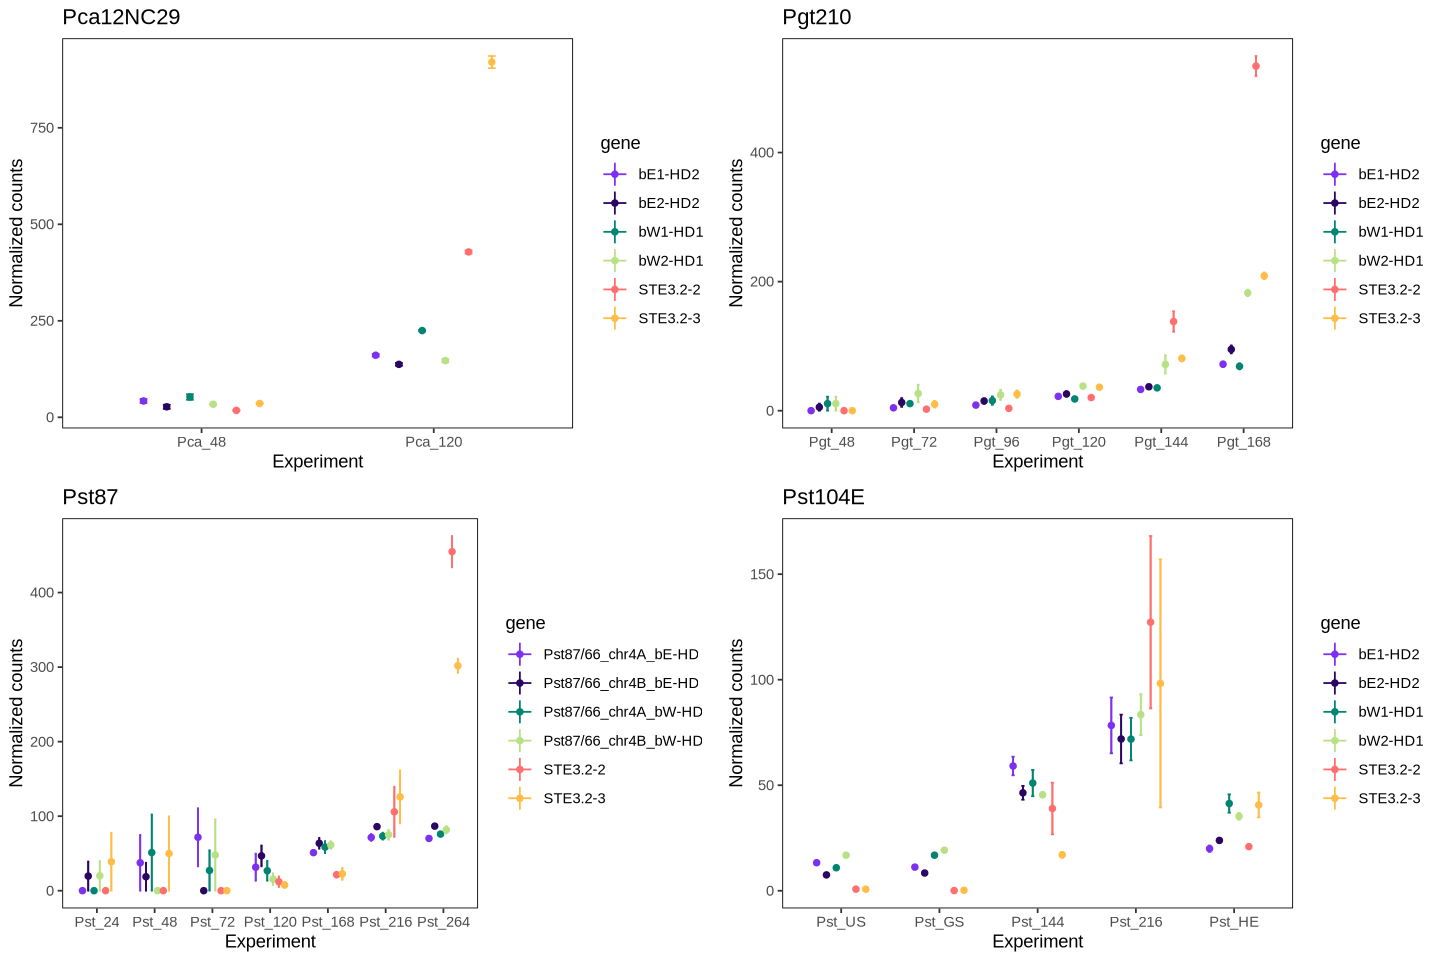

In [15]:
for (i in samples){
 plot<-ggplot(eval(as.symbol(paste0(i, "_MAT_cpms_melt")))) + #, aes(x = group, y = mean, color = gene)) +
#  geom_bar(stat="identity", position = position_dodge(width = 0.5), width=0.55) 
#   geom_point(size=3, position=position_dodge(0.8)) + #geom_segment(aes(xend = lag(group), yend = lag(mean))) + 
   geom_pointrange(aes(x = group, y = mean, ymin = mean -  std_error, ymax = mean +  std_error , color=gene), position = position_dodge(width=0.6), size=0.2) +
    geom_errorbar(aes(x = group, y = mean, ymin = mean -  std_error, ymax = mean +  std_error , color=gene), position = position_dodge(width=0.6), width=0.2)+
  labs(x = "Experiment", y = "Normalized counts") + scale_color_manual(values=c("#7D30F0", "#2A0561", "#018571", "#B8E186",  "#FF6F6F","#FFBC47")) +
  ggtitle(paste0(i)) +theme(panel.background = element_rect(fill = "white"),
                              panel.border = element_rect(color = "black", fill = NA),legend.key=element_blank())
 assign(paste0(i,"_dotplot"), plot)
# ggsave(file=paste0(i,"_dotplot.svg"), plot=plot, width = 4, height = 3, units = "in", dpi = 300)
}
options(repr.plot.width=12, repr.plot.height=8)
grid.arrange(Pca12NC29_dotplot, Pgt210_dotplot, Pst87_dotplot, Pst104E_dotplot, nrow = 2, ncol = 2)

In [16]:
#find genes which didn't change in all time points
for (i in samples){
  contrast <- eval(as.symbol(paste0(i, "_contrast_matrix"))) %>%as.data.frame()%>%colnames()
  for (c in contrast){
   # assign(paste0(i, ".", c, "_low"), topTags(eval(as.symbol(paste0(i, ".",c))), n=Inf, sort.by="none")%>%
   #   as.data.frame%>%filter(FDR>0.05)%>%filter(PValue>0.05)%>%filter(abs(logFC)<1))
  #conditions of looking for genes which has no significant change in all time points
    assign(paste0(i, ".", c, "_low"), eval(as.symbol(paste0(i, ".",c)))$table%>%
    as.data.frame%>%filter(PValue>0.1)%>%filter(abs(logFC)<0.5))
    gene_list <- rownames(eval(as.symbol(paste0(i, ".", c, "_low"))))
    assign(paste0(i, ".", c, "_low_gene_list"), gene_list)
  }
  #find genes occur in all genes list
  gene_list <- Reduce(intersect, list(eval(as.symbol(paste0(i, ".", contrast, "_low_gene_list")))))
  assign(paste0(i, "_low_gene_list"), gene_list)
}

In [17]:
for (i in samples){
  contrast <- eval(as.symbol(paste0(i, "_contrast_matrix"))) %>%as.data.frame()%>%colnames()
  tmp <- list()
  constructed_name <- paste0(i, ".", contrast, "_low_gene_list")
  num_contrast <- length(constructed_name)
  for (n in constructed_name){
    tmp[[n]] <- eval(as.symbol(n))
  }
    count_gene_occurence <- function(gene, gene_list){
  sapply(gene_list, function(lst)
  sum(gene %in% lst))
}
    all_genes<-tmp
    unique_genes<-unique(unlist(all_genes))
    occurance_matrix<-sapply(unique_genes, function(g)
      count_gene_occurence(g, all_genes))
    #convert rownames to column
    occurance_matrix<-t(occurance_matrix)
    #Find rows sum >=5
    if(i=="Pca12NC29"){
    candidate<-occurance_matrix%>%as.data.frame%>%filter(rowSums(.)==num_contrast)%>%rownames()}
    else{
    candidate<-occurance_matrix%>%as.data.frame%>%filter(rowSums(.)>=num_contrast-1)%>%rownames()
    }
    cpms <-eval(as.symbol(paste0(i, "_cpms")))
    candidate <- cpms[candidate,]
    candidate <- candidate[rowSums(candidate==0)<4,]
    assign(paste0(i, "_candidate"), candidate)
}

In [18]:
#HKG for Pst87
Pst87_HKG<-c("Pst134E_024869","Pst134E_005226")
Pst87_HKG<-Pst87_cpms[Pst87_HKG,]
#HKG for Pst104E
Pst104E_HKG<-c("COG3_2","CTR2")
Pst104E_HKG<-Pst104E_cpms[Pst104E_HKG,]
#HKG for Pgt210
Pgt210_HKG<-c("ACTIN2_1","UBP6_1")
Pgt210_HKG<-Pgt210_cpms[Pgt210_HKG,]
#HKG for Pca12NC29
Pca12NC29_HKG<-c("tfs1_1","ARP3_1")
Pca12NC29_HKG<-Pca12NC29_cpms[Pca12NC29_HKG,]

In [19]:
Pca12NC29_tx2gene%>%filter(V1 =="PCANC_04031")

V1,V2
<chr>,<chr>
PCANC_04031,tfs1_1


In [20]:
all_genes<- list(Pst87.48V24_low_gene_list,Pst87.72V48_low_gene_list,Pst87.120V72_low_gene_list,Pst87.168V120_low_gene_list,Pst87.216V168_low_gene_list,Pst87.264V216_low_gene_list)
count_gene_occurence <- function(gene, gene_list){
  sapply(gene_list, function(lst)
  sum(gene %in% lst))
}
unique_genes<-unique(unlist(all_genes))
occurance_matrix<-sapply(unique_genes, function(g)
count_gene_occurence(g, all_genes))
#convert matrix to data frame, convert rownames to column
occurance_matrix<-as.data.frame(occurance_matrix)
rownames(occurance_matrix)<-c("48V24","72V48","120V72","168V120","216V168","264V216")
#convert rownames to column
occurance_matrix<-t(occurance_matrix)
#Find rows sum >=5
Pst87_candidate<-occurance_matrix%>%as.data.frame%>%filter(rowSums(.)>=5)%>%rownames()
candidate <- Pst87_cpms[Pst87_candidate,]
candidate <- candidate[rowSums(candidate==0)<4,]

In [21]:
for (i in samples){
  data <- eval(as.symbol(paste0(i, "_HKG")))%>%melt()
  colnames(data) <- c("gene", "Timepoint", "cpm")
  data <- mutate(data, group = str_replace(Timepoint, ".{2}$", ""))%>%mutate(cpm = as.numeric(cpm))%>%
    group_by(group, gene) %>%
    summarize(std_error = sd(cpm)/sqrt(length(cpm)) , mean = mean(cpm))%>%as.data.frame
  assign(paste0(i, "_HKG_cpms_melt"), data)
}
#Set levels for group
Pca12NC29_HKG_cpms_melt$group <- factor(Pca12NC29_HKG_cpms_melt$group, levels = c("Pca_48", "Pca_120"))
Pgt210_HKG_cpms_melt$group <- factor(Pgt210_HKG_cpms_melt$group, levels = c("Pgt_48", "Pgt_72", "Pgt_96", "Pgt_120", "Pgt_144", "Pgt_168"))
Pst87_HKG_cpms_melt$group <- factor(Pst87_HKG_cpms_melt$group, levels = c("Pst_24", "Pst_48", "Pst_72", "Pst_120", "Pst_168", "Pst_216", "Pst_264"))
Pst104E_HKG_cpms_melt$group <- factor(Pst104E_HKG_cpms_melt$group, levels = c("Pst_US", "Pst_GS", "Pst_144", "Pst_216", "Pst_HE"))
Pst87_HKG_cpms_melt<-Pst87_HKG_cpms_melt%>%mutate(gene = gsub("Pst134E_024869","COG3_2",gene))%>%mutate(gene = gsub("Pst134E_005226","CTR2",gene))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

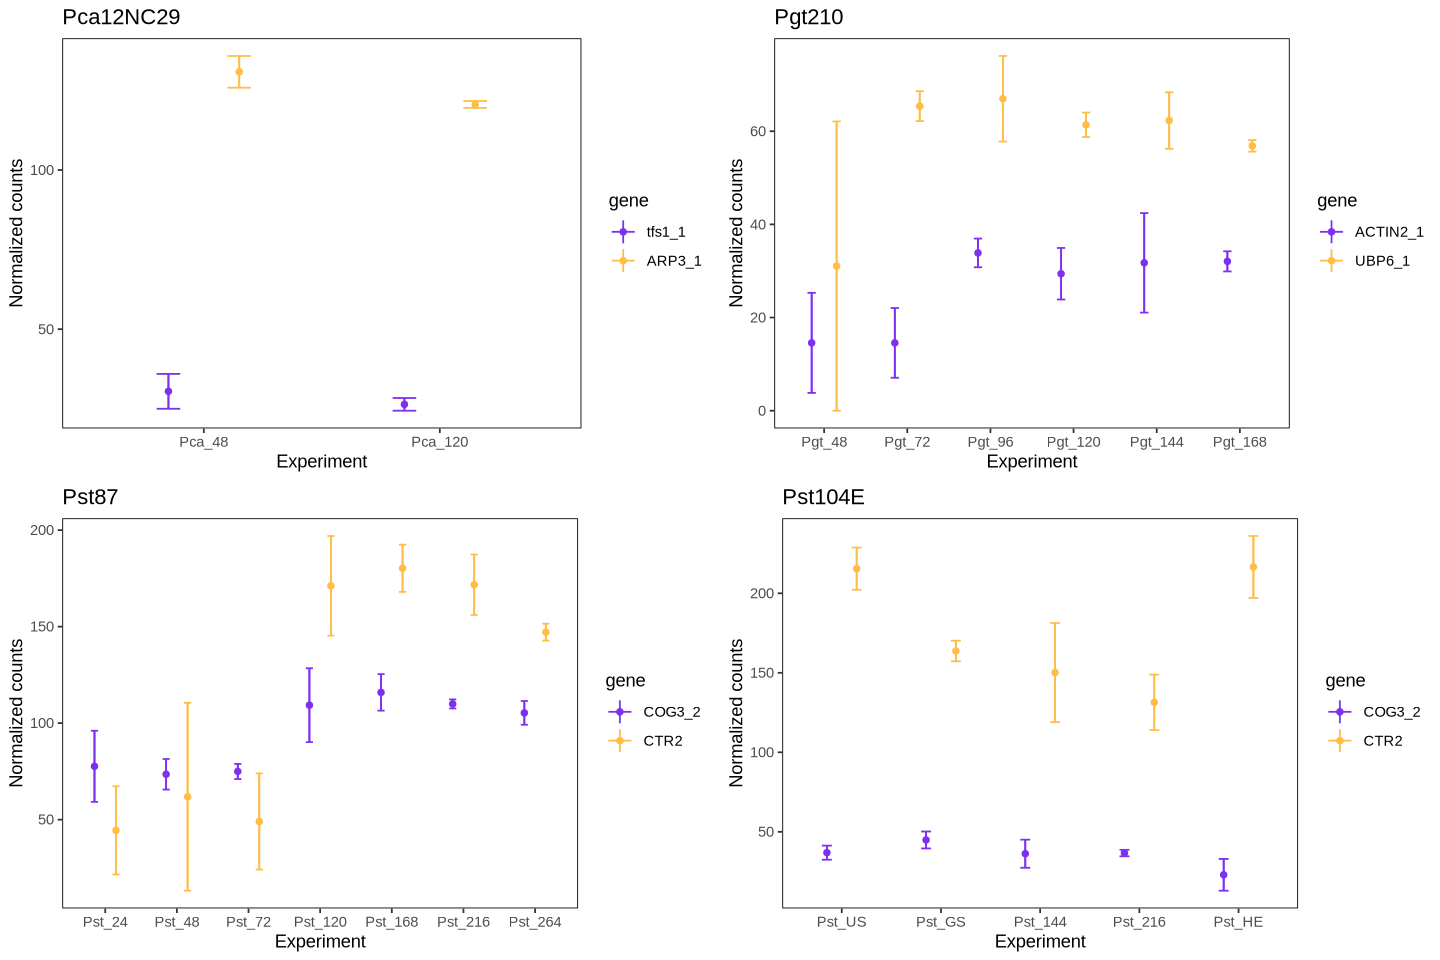

In [22]:
for (i in samples){
 plot<-ggplot(eval(as.symbol(paste0(i, "_HKG_cpms_melt")))) + #, aes(x = group, y = mean, color = gene)) +
#  geom_bar(stat="identity", position = position_dodge(width = 0.5), width=0.55) 
#   geom_point(size=3, position=position_dodge(0.8)) + #geom_segment(aes(xend = lag(group), yend = lag(mean))) + 
   geom_pointrange(aes(x = group, y = mean, ymin = mean -  std_error, ymax = mean +  std_error , color=gene), position = position_dodge(width=0.6), size=0.2) +
    geom_errorbar(aes(x = group, y = mean, ymin = mean -  std_error, ymax = mean +  std_error , color=gene), position = position_dodge(width=0.6), width=0.2)+
  labs(x = "Experiment", y = "Normalized counts") + scale_color_manual(values=c("#7D30F0", "#FFBC47")) +
  ggtitle(paste0(i)) +theme(panel.background = element_rect(fill = "white"),
                              panel.border = element_rect(color = "black", fill = NA),legend.key=element_blank())
 assign(paste0(i,"_HKG_dotplot"), plot)
# ggsave(file=paste0(i,"_dotplot.svg"), plot=plot, width = 4, height = 3, units = "in", dpi = 300)
}
options(repr.plot.width=12, repr.plot.height=8)
graph<-grid.arrange(Pca12NC29_HKG_dotplot, Pgt210_HKG_dotplot, Pst87_HKG_dotplot, Pst104E_HKG_dotplot, nrow = 2, ncol = 2)
graph
ggsave(file=paste0("HKG_dotplot.svg"), plot=graph, width = 12, height = 8, units = "in", dpi = 300)

In [23]:
for (i in samples){
  contrast <- eval(as.symbol(paste0(i, "_contrast_matrix"))) %>%as.data.frame()%>%colnames()
  for (c in contrast){
    LRT_value <- eval(as.symbol(paste0(i, ".",c)))$table%>%as.data.frame()
    HKG<-eval(as.symbol(paste0(i, "_HKG")))%>%rownames
    LRT_value <- LRT_value[HKG,]%>%select("logFC", "PValue")%>%mutate(gene=HKG,cont=c, sample=i)
    if(c == contrast[1]){
      assign(paste0(i, "_LRT_HKG_value"), LRT_value)
    }else{
      assign(paste0(i, "_LRT_HKG_value"), rbind(eval(as.symbol(paste0(i, "_LRT_HKG_value"))), LRT_value))
    }
  }
 }
 for (i in samples){
  LRT <- eval(as.symbol(paste0(i, "_LRT_HKG_value")))
  LRT$P_value<-ifelse(LRT$PValue < 0.001, "***",
                              ifelse(LRT$PValue < 0.01, "**",
                                     ifelse(LRT$PValue < 0.05, "*", "")))
  LRT$cont <-factor(LRT$cont, levels = unique(LRT$cont))
  assign(paste0(i, "_LRT_HKG"), LRT)                                    
}
Pst87_LRT_HKG<-Pst87_LRT_HKG%>%mutate(gene = gsub("Pst134E_024869","COG3_2",gene))%>%mutate(gene = gsub("Pst134E_005226","CTR2",gene))

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

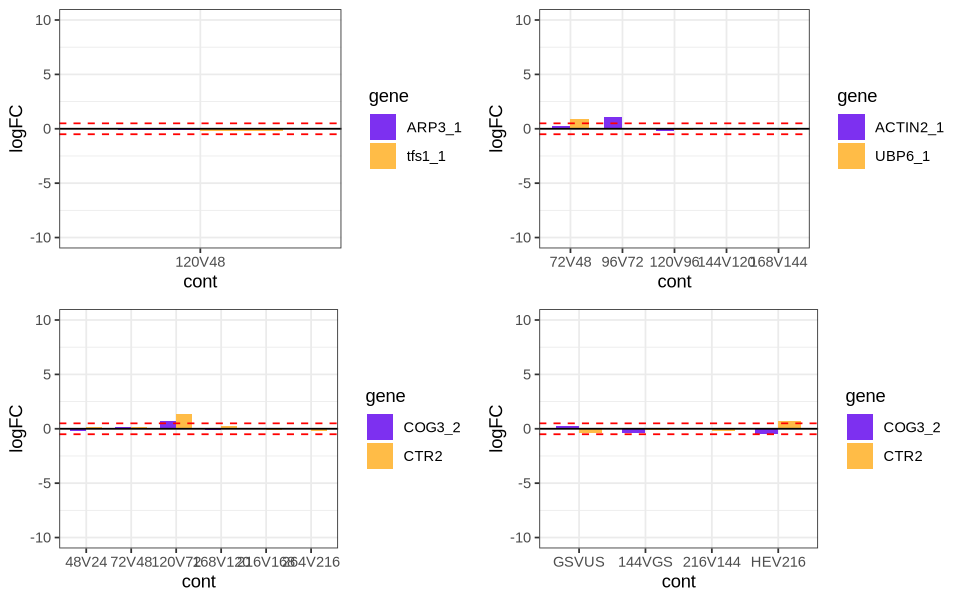

In [24]:
for (i in samples){
  FC <- eval(as.symbol(paste0(i, "_LRT_HKG")))
  FC_plot <- ggplot(FC, aes(x=cont, y=logFC,fill=gene)) + 
  geom_bar(stat="identity", position = "dodge", width=0.7) +
  scale_y_continuous(limits = c(-10,10))+ scale_fill_manual(values=c("#7D30F0", "#FFBC47"))+theme_minimal()+
#  scale_y_break(c(0.5, 1), scales = 1)+scale_y_break(c(-0.5, -1), scales = 1)+
  theme_bw()+geom_hline(yintercept=0.5, linetype="dashed", color = "red", size=0.5)+geom_hline(yintercept=-0.5, linetype="dashed", color = "red", size=0.5)+
  geom_text(aes(label = P_value), position = position_dodge(width = 0.7), vjust = 0.5, angle = 90, hjust = ifelse(FC$logFC > 0, -1, 1)) +geom_hline(yintercept=0, color = "black", size=0.5)
  assign(paste0(i, "_FC_HKG_plot"), FC_plot)
#  ggsave(file=paste0(i,"_FC_plot.svg"), plot=FC_plot, width = 8, height = 5, units = "in", dpi = 300)
}
options(repr.plot.width=8, repr.plot.height=5)
graph<-grid.arrange(Pca12NC29_FC_HKG_plot, Pgt210_FC_HKG_plot, Pst87_FC_HKG_plot, Pst104E_FC_HKG_plot, nrow = 2, ncol = 2)
graph
ggsave(file=paste0("HKG_FC.svg"), plot=graph, width = 12, height = 8, units = "in", dpi = 300)

In [77]:
all_genes<- list(Pst87.48V24_low_gene_list,Pst87.72V48_low_gene_list,Pst87.120V72_low_gene_list,Pst87.168V120_low_gene_list,Pst87.216V168_low_gene_list,Pst87.264V216_low_gene_list)
count_gene_occurence <- function(gene, gene_list){
  sapply(gene_list, function(lst)
  sum(gene %in% lst))
}
unique_genes<-unique(unlist(all_genes))
occurance_matrix<-sapply(unique_genes, function(g)
count_gene_occurence(g, all_genes))
#convert matrix to data frame, convert rownames to column
occurance_matrix<-as.data.frame(occurance_matrix)
rownames(occurance_matrix)<-c("48V24","72V48","120V72","168V120","216V168","264V216")
#convert rownames to column
occurance_matrix<-t(occurance_matrix)
#Find rows sum >=5
Pst87_candidate<-occurance_matrix%>%as.data.frame%>%filter(rowSums(.)>=5)%>%rownames()
candidate <- Pst87_cpms[Pst87_candidate,]
candidate <- candidate[rowSums(candidate==0)<4,]

In [109]:
#genes in low_gene_list which express all the time
#for (i in samples){
#  candidate <- eval(as.symbol(paste0(i, "_cpms")))[eval(as.symbol(paste0(i, "_low_gene_list"))),]
  #find lines which have less than three 0 in each line
#  candidate <- candidate[rowSums(candidate==0)<4,]
#  assign(paste0(i, "_nochange_candidate"), candidate)
#}

#Now find this genes corresponding id in tx2gene
for (i in samples){
  tx2gene <- eval(as.symbol(paste0(i, "_tx2gene")))
  nochange_candidate <- eval(as.symbol(paste0(i, "_candidate")))
  transcript_name <- tx2gene[tx2gene$V2 %in% rownames(nochange_candidate),]%>%as.data.frame%>%select("V1")
  assign(paste0(i, "_nochange_candidate_transcript_name"), transcript_name)
}

In [112]:
#Save unchange genes as list seprately
write.table(Pca12NC29_nochange_candidate_transcript_name, file = "Pca12NC29_nochange_candidate_transcript_name.txt", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(Pgt210_nochange_candidate_transcript_name, file = "Pgt210_nochange_candidate_transcript_name.txt", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(Pst87_nochange_candidate_transcript_name, file = "Pst87_nochange_candidate_transcript_name.txt", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(Pst104E_nochange_candidate_transcript_name, file = "Pst104E_nochange_candidate_transcript_name.txt", row.names = FALSE, col.names = FALSE, quote = FALSE)